In [78]:
import numpy as np
import pandas as pd
import math

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import warnings
warnings.filterwarnings('ignore')

In [79]:
filename= 'C:/Users/yasig/Desktop/precipitation1.xlsx'

In [3]:
rainfall_data_matrix = pd.read_excel(filename)
rainfall_data_matrix.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1970,2.22,1.76,2.34,0.00,0.00,0.00,0.0,0.00,0.00,...,NaN,0.0,NaN,0.0,NaN,2.51,NaN,3.08,NaN,11.91
1,1971,1.12,0.43,0.27,0.38,0.57,0.03,0.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1972,0.00,0.03,0.00,0.00,0.08,0.27,0.0,0.63,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1973,3.10,4.18,2.26,0.00,0.00,0.00,0.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1974,5.05,0.04,3.74,0.35,0.19,0.00,0.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
rainfall_data_matrix = pd.read_excel(filename)
rainfall_data_matrix.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1970,2.22,1.76,2.34,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2.51,3.08
1,1971,1.12,0.43,0.27,0.38,0.57,0.03,0.0,0.00,0.00,0.00,0.00,5.51
2,1972,0.00,0.03,0.00,0.00,0.08,0.27,0.0,0.63,0.05,0.35,3.09,1.73
3,1973,3.10,4.18,2.26,0.00,0.00,0.00,0.0,0.00,0.00,0.02,1.77,0.29
4,1974,5.05,0.04,3.74,0.35,0.19,0.00,0.0,0.00,0.00,0.29,0.00,4.05


In [5]:
rainfall_data_matrix.set_index('Year', inplace=True)
rainfall_data_matrix.head()

KeyError: 'Year'

In [6]:
filename= 'C:/Users/yasig/Desktop/precipitation1.csv'

In [7]:
rainfall_data_matrix = pd.read_csv(filename)
rainfall_data_matrix.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1970,2.22,1.76,2.34,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2.51,3.08
1,1971,1.12,0.43,0.27,0.38,0.57,0.03,0.0,0.00,0.00,0.00,0.00,5.51
2,1972,0.00,0.03,0.00,0.00,0.08,0.27,0.0,0.63,0.05,0.35,3.09,1.73
3,1973,3.10,4.18,2.26,0.00,0.00,0.00,0.0,0.00,0.00,0.02,1.77,0.29
4,1974,5.05,0.04,3.74,0.35,0.19,0.00,0.0,0.00,0.00,0.29,0.00,4.05


In [8]:
rainfall_data_matrix.set_index('Year', inplace=True)
rainfall_data_matrix.head()

KeyError: 'Year'

In [9]:
rainfall_data_matrix.set_index('YEAR', inplace=True)
rainfall_data_matrix.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1970,2.22,1.76,2.34,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2.51,3.08
1971,1.12,0.43,0.27,0.38,0.57,0.03,0.0,0.00,0.00,0.00,0.00,5.51
1972,0.00,0.03,0.00,0.00,0.08,0.27,0.0,0.63,0.05,0.35,3.09,1.73
1973,3.10,4.18,2.26,0.00,0.00,0.00,0.0,0.00,0.00,0.02,1.77,0.29
1974,5.05,0.04,3.74,0.35,0.19,0.00,0.0,0.00,0.00,0.29,0.00,4.05


In [10]:
rainfall_data_matrix = rainfall_data_matrix.transpose()
rainfall_data_matrix

YEAR,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
JAN,2.22,1.12,0.00,3.10,5.05,0.46,0.00,3.25,7.91,5.37,...,3.76,0.75,6.01,1.02,1.30,0.84,0.00,0.88,2.26,7.34
FEB,1.76,0.43,0.03,4.18,0.04,1.44,2.45,1.67,7.35,2.18,...,1.95,3.27,4.21,1.91,0.78,0.32,1.42,0.41,0.25,3.20
MAR,2.34,0.27,0.00,2.26,3.74,3.64,1.64,0.95,7.82,4.79,...,0.06,0.04,0.26,2.30,1.51,0.38,0.68,0.42,0.97,0.05
APR,0.00,0.38,0.00,0.00,0.35,1.82,0.94,0.00,1.65,0.00,...,0.02,0.17,1.22,0.00,3.09,0.06,0.37,0.16,0.15,0.08
MAY,0.00,0.57,0.08,0.00,0.19,0.10,0.00,2.00,0.00,0.00,...,0.17,0.00,0.05,0.45,0.00,0.54,0.00,0.89,0.58,0.09
JUN,0.00,0.03,0.27,0.00,0.00,0.00,0.59,0.00,0.00,0.00,...,0.00,0.10,0.00,0.04,0.00,0.00,0.00,0.01,0.03,0.00
JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,...,0.00,0.00,0.02,0.00,0.12,0.06,0.00,0.41,0.00,0.00
AUG,0.00,0.00,0.63,0.00,0.00,0.00,0.00,2.08,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00
SEP,0.00,0.00,0.05,0.00,0.00,0.00,2.35,0.17,1.72,0.00,...,0.00,0.00,0.00,0.06,0.00,0.00,0.00,1.28,0.02,0.07
OCT,0.00,0.00,0.35,0.02,0.29,0.51,0.00,0.00,0.08,0.00,...,0.00,0.67,2.66,0.85,0.32,0.22,0.00,0.06,0.66,0.00


In [34]:
dates = pd.date_range(start='1970-01', freq='MS', periods=len(rainfall_data_matrix.columns)*12)
dates

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', length=576, freq='MS')

Text(0.5,1,'Month vs Precipitation across all years')

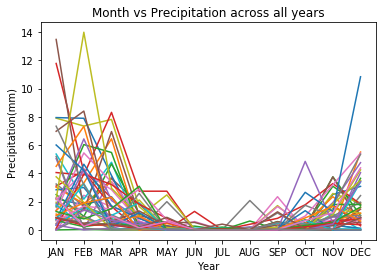

In [12]:
plt.plot(rainfall_data_matrix)
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

Text(0.5,1,'Month vs Precipitation across all years')

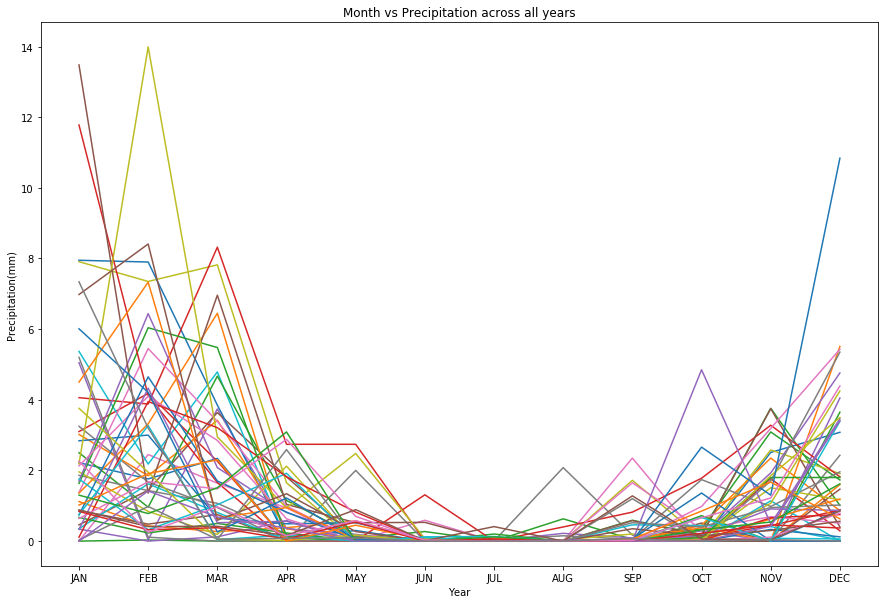

In [13]:
plt.figure(figsize=(15,10))
plt.plot(rainfall_data_matrix)
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

Text(0.5,1,'Month vs Precipitation across all years')

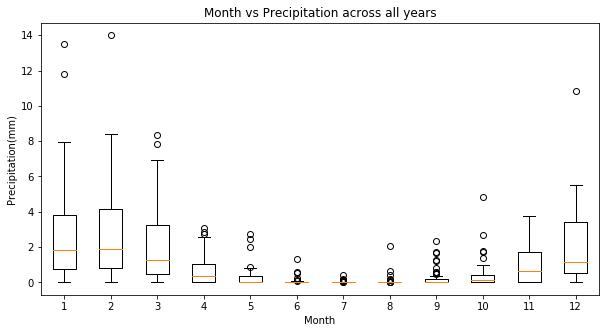

In [14]:
plt.figure(figsize=(10,5))
plt.boxplot(rainfall_data_matrix)
plt.xlabel('Month')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

In [28]:
rainfall_data_matrix_np = rainfall_data_matrix.transpose().as_matrix()

shape = rainfall_data_matrix_np.shape
rainfall_data_matrix_np = rainfall_data_matrix_np.reshape((shape[0] * shape[1], 1))

In [35]:
rainfall_data = pd.DataFrame({'Precipitation': rainfall_data_matrix_np[:,0]})
rainfall_data.set_index(dates, inplace=True)

test_rainfall_data = rainfall_data.ix['2000': '2017']
rainfall_data = rainfall_data.ix[: '1999']
rainfall_data.head()

,Precipitation
1970-01-01,2.22
1970-02-01,1.76
1970-03-01,2.34
1970-04-01,0.00
1970-05-01,0.00


Text(0.5,1,'Precipitation in mm')

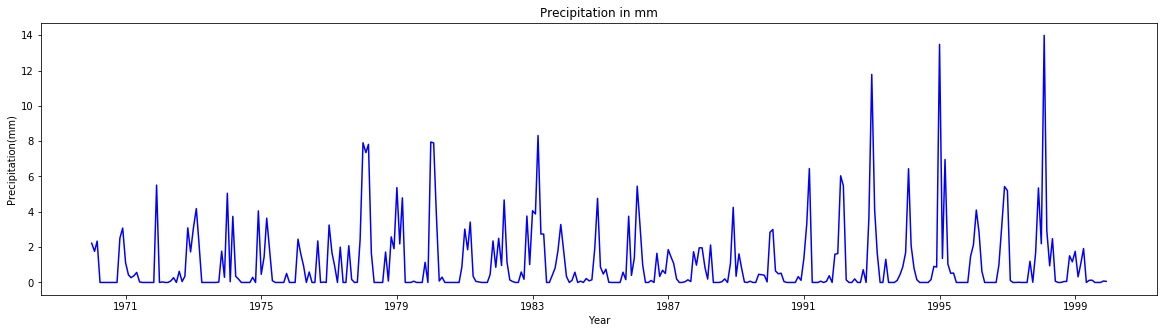

In [36]:
plt.figure(figsize=(20,5))
plt.plot(rainfall_data, color='blue')
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Precipitation in mm')

Text(0.5,1,'Precipitation in mm')

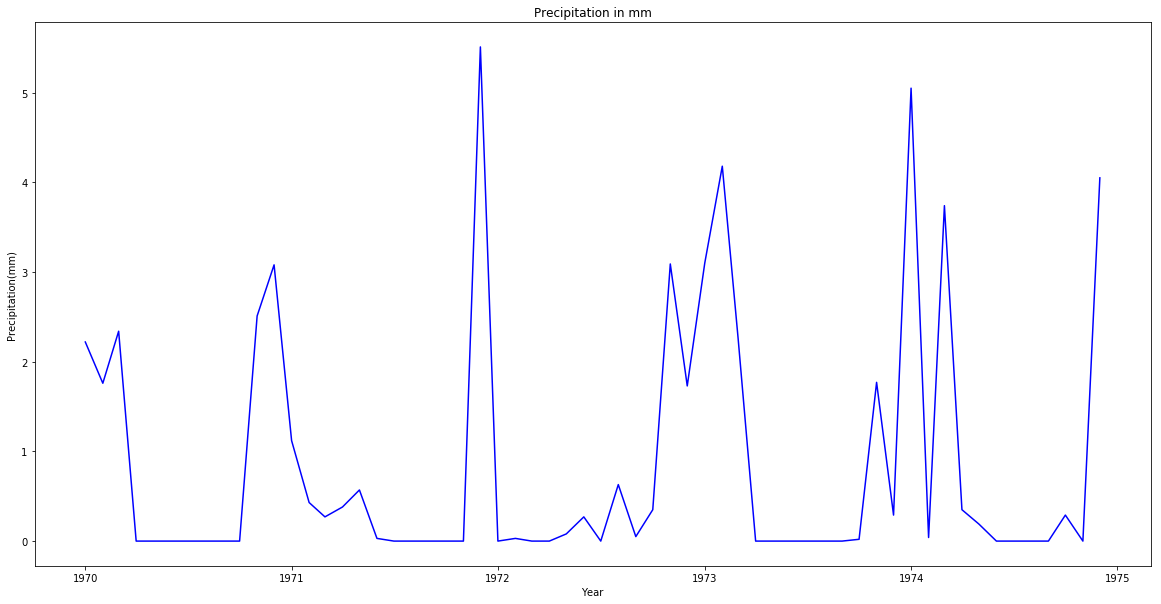

In [38]:
plt.figure(figsize=(20,10))
plt.plot(rainfall_data.ix[:60], color='blue')
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Precipitation in mm')

In [39]:
decomposition = sm.tsa.seasonal_decompose(rainfall_data, model='additive')

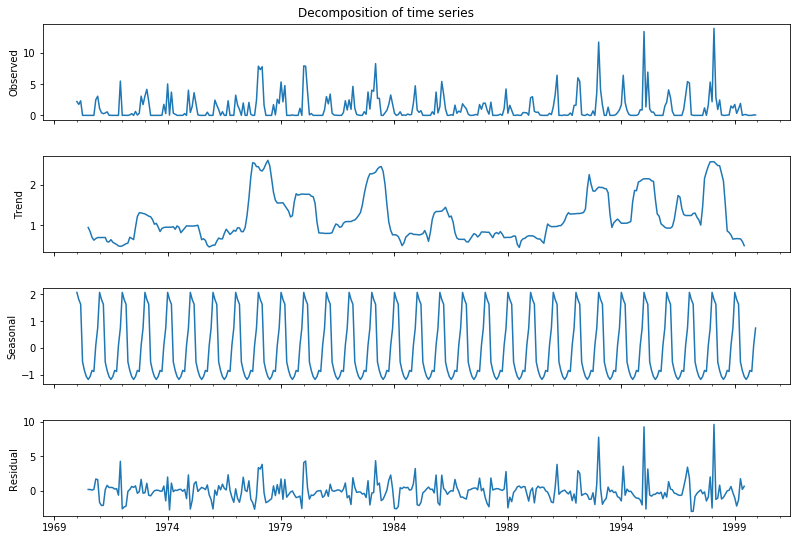

In [40]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of time series')
plt.show()

Text(0.5,1,'4 Months Moving Average')

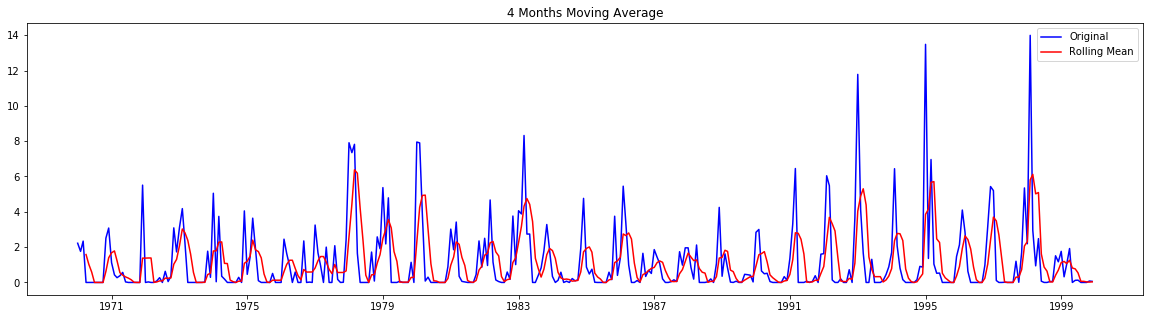

In [41]:
plt.figure(figsize=(20,5))
four_months_moving_average = rainfall_data.rolling(window=4).mean()
plt.plot(rainfall_data, color='blue', label='Original')
plt.plot(four_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('4 Months Moving Average')

Text(0.5,1,'6 Months Moving Average')

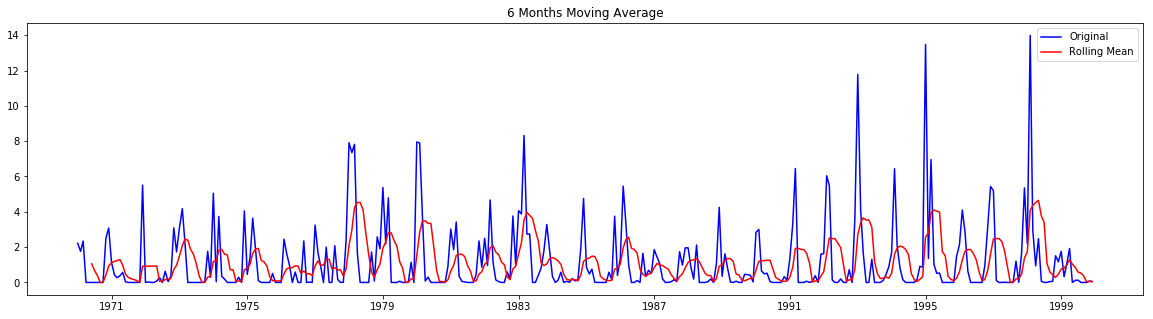

In [42]:
plt.figure(figsize=(20,5))
six_months_moving_average = rainfall_data.rolling(window=6).mean()
plt.plot(rainfall_data, color='blue', label='Original')
plt.plot(six_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('6 Months Moving Average')

Text(0.5,1,'8 Months Moving Average')

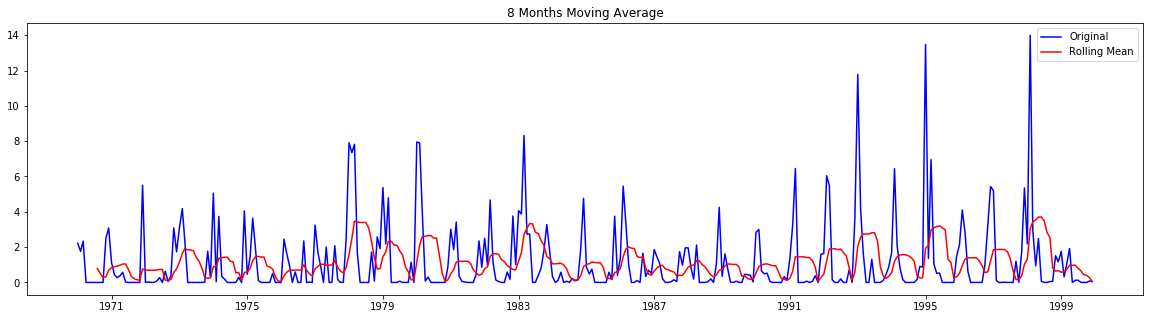

In [43]:
plt.figure(figsize=(20,5))
eight_months_moving_average = rainfall_data.rolling(window=8).mean()
plt.plot(rainfall_data, color='blue', label='Original')
plt.plot(eight_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('8 Months Moving Average')

Text(0.5,1,'12 Months Moving Average')

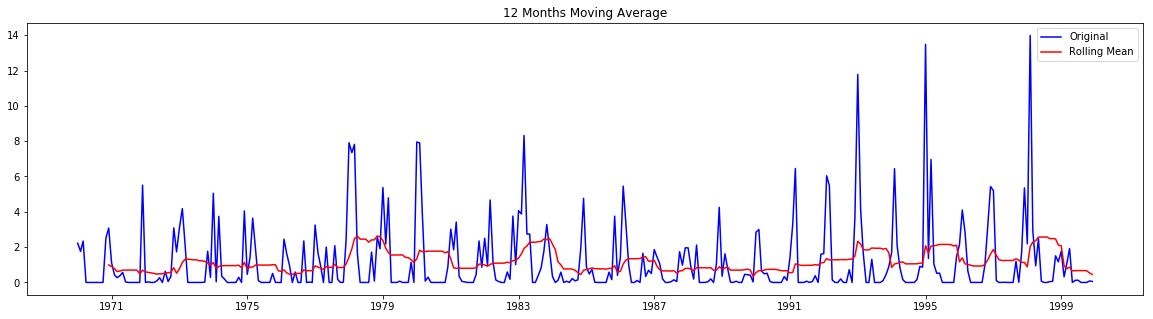

In [46]:
plt.figure(figsize=(20,5))
twelve_months_moving_average = rainfall_data.rolling(window=12).mean()
plt.plot(rainfall_data, color='blue', label='Original')
plt.plot(twelve_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('12 Months Moving Average')

In [48]:
def test_stationary(timeseries, window=12):
    print('Results of Dickey Fuller Test:\n')
    dftest = adfuller(timeseries['Precipitation'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

In [49]:
test_stationary(rainfall_data, window=12)

Results of Dickey Fuller Test:

Test Statistic                  -4.236338
p-value                          0.000572
No. of Lags used                14.000000
Number of observations used    345.000000
Critical Value (1%)             -3.449447
Critical Value (5%)             -2.869954
Critical Value (10%)            -2.571253
dtype: float64


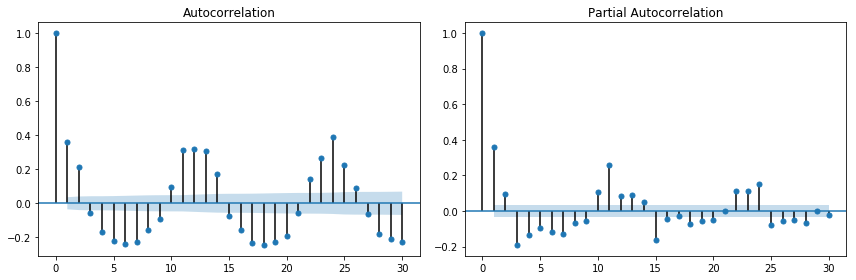

In [50]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(rainfall_data, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(rainfall_data, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

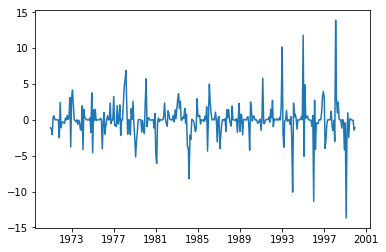

In [51]:
diff_12 = rainfall_data.diff(periods=12)
diff_12.dropna(inplace=True)

plt.plot(diff_12)

In [52]:
test_stationary(diff_12)

Results of Dickey Fuller Test:

Test Statistic                -5.949297e+00
p-value                        2.166329e-07
No. of Lags used               1.300000e+01
Number of observations used    3.340000e+02
Critical Value (1%)           -3.450081e+00
Critical Value (5%)           -2.870233e+00
Critical Value (10%)          -2.571401e+00
dtype: float64


In [53]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [54]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [55]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [56]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(rainfall_data,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 model - AIC:1375.7798918253266


In [57]:
best_pdq = (0, 1, 1)
best_seasonal_pdq = (0, 1, 1, 12)

In [58]:
best_model = sm.tsa.statespace.SARIMAX(rainfall_data,
                                      order=best_pdq,
                                      seasonal_order=best_seasonal_pdq,
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [59]:
print(best_results.summary().tables[0])

                                 Statespace Model Results                                 
Dep. Variable:                      Precipitation   No. Observations:                  360
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -690.733
Date:                            Sun, 02 Dec 2018   AIC                           1387.467
Time:                                    16:23:19   BIC                           1399.015
Sample:                                01-01-1970   HQIC                          1392.064
                                     - 12-01-1999                                         
Covariance Type:                              opg                                         


In [60]:
pd.to_datetime('1995-01-01')

Timestamp('1995-01-01 00:00:00')

In [61]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1995-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()


In [62]:
rainfall_predicted = pred_dynamic.predicted_mean
rainfall_truth = rainfall_data['1995':].Precipitation

In [63]:
mse = ((rainfall_predicted - rainfall_truth) ** 2).mean()
print('The Mean Squared Error of our predictions is {}'.format(round(mse, 4)))

The Mean Squared Error of our predictions is 5.5638


In [64]:
rainfall_data.index[-1]

Timestamp('1999-12-01 00:00:00', freq='MS')

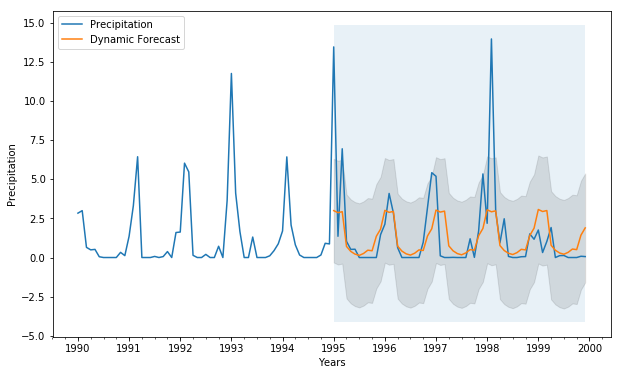

In [65]:
axis_plt = rainfall_data['1990':].plot(label='Observed', figsize=(10, 6))
pred_dynamic.predicted_mean.plot(ax=axis_plt, label='Dynamic Forecast')

axis_plt.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=0.1)

axis_plt.fill_betweenx(axis_plt.get_ylim(), pd.to_datetime('1995'), rainfall_data.index[-1], alpha=0.1, zorder=-1)

axis_plt.set_xlabel('Years')
axis_plt.set_ylabel('Precipitation')

plt.legend(loc='best')

In [76]:
n_steps = 228
pred_uc_2000 = best_results.get_forecast(steps=n_steps, alpha=0.05)

pred_ci_2000 = pred_uc_2000.conf_int()

index = pd.date_range(rainfall_data.index[-1] + 1, periods=n_steps, freq='MS')
forecast_data = pd.DataFrame(np.column_stack([pred_uc_2000.predicted_mean, pred_ci_2000]), 
                     index=index, columns=['forecast', 'lower_ci_2000', 'upper_ci_2000'])
forecast_data.head()

,forecast,lower_ci_2000,upper_ci_2000
2000-01-01,3.317921,0.011133,6.624709
2000-02-01,3.047947,-0.260987,6.356882
2000-03-01,2.894860,-0.416220,6.205940
2000-04-01,0.734878,-2.578346,4.048102
2000-05-01,0.418875,-2.896491,3.734241


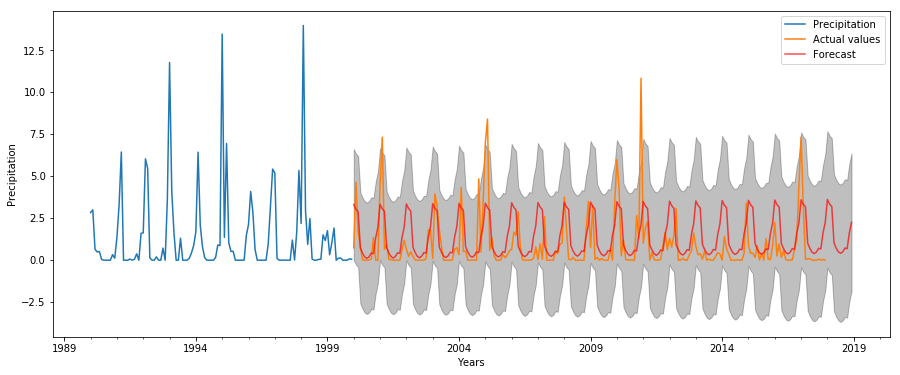

In [77]:
axis_plt = rainfall_data['1990':'2017'].plot(label='Observed', figsize=(15, 6))

test_rainfall_data.Precipitation.plot(ax=axis_plt, label='Actual values')
forecast_data['forecast'].plot(ax=axis_plt, label='Forecast', alpha=0.7, color='r')

axis_plt.fill_between(forecast_data.index, forecast_data['lower_ci_2000'], forecast_data['upper_ci_2000'], color='k', alpha=.25)

axis_plt.set_xlabel('Years')
axis_plt.set_ylabel('Precipitation')
plt.legend(loc='best')